In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve,auc
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
#Load up data
trainfile=r'C:\Users\olive\OneDrive\Documents\Lab Work IOD\Presentations\Capstone\cleandata.csv'
banking = pd.read_csv(trainfile, header=0)
banking

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,MIS_Status,GrAppv,AK,AL,...,"Professional, Scientific, and Technical Services",Public Administration,Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade,Franchise,Urban,Rural
0,1997.0,84,4,1.0,0,0,0,60000.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1997.0,60,2,1.0,0,0,0,40000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997.0,180,7,0.0,0,0,0,287000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1997.0,60,2,0.0,0,0,0,35000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1997.0,240,14,0.0,7,7,0,229000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888866,1997.0,60,6,0.0,0,0,0,70000.0,0,0,...,0,0,0,1,0,0,0,0,0,0
888867,1997.0,60,6,0.0,0,0,0,85000.0,0,0,...,0,0,0,1,0,0,0,0,0,0
888868,1997.0,108,26,0.0,0,0,0,300000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
888869,1997.0,60,6,0.0,0,0,1,75000.0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modelling 
Before we fully begin modelling need to set up the response and predictor variables as well as split the data into training and testing sets as well as standardise it

In [3]:
#Get predictor and response variables
y=banking['MIS_Status']
X=banking.iloc[:,banking.columns != 'MIS_Status']

In [4]:
#Split the data into test train set
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=12)

In [5]:
#Standardise the data
sc=StandardScaler()
std_Xtrain=sc.fit_transform(X_train)
std_Xtest=sc.transform(X_test)

## Logistic Regression
The first model we will use to predict is logistic regression

In [6]:
regressor=LogisticRegression()
log_reg=regressor.fit(std_Xtrain,y_train)

In [7]:
#score for train
regressor.score(std_Xtrain,y_train)

0.8490084046722958

In [8]:
#score for test
regressor.score(std_Xtest,y_test)

0.8475821040599771

In [9]:
#Get confusion matrix and classification report
logpred=regressor.predict(std_Xtest)
#confusion matrix and classification report
log_cm=metrics.confusion_matrix(y_test,logpred)
log_cr=metrics.classification_report(y_test,logpred)
log_cm

array([[178533,   4364],
       [ 29506,   9815]], dtype=int64)

In [10]:
print(log_cr)

              precision    recall  f1-score   support

           0       0.86      0.98      0.91    182897
           1       0.69      0.25      0.37     39321

    accuracy                           0.85    222218
   macro avg       0.78      0.61      0.64    222218
weighted avg       0.83      0.85      0.82    222218



From here we can see our model is scoring poorly in regards to identifying those loans that default which makes the high scores in the accuracy misleading as it is doing well on the majority of cases are paid loans but we are really concerned with how well it is getting the defaults which it does poorly in

## Decision Tree

In [6]:
clf=DecisionTreeClassifier(random_state=12)

In [7]:
clf.fit(std_Xtrain,y_train)

DecisionTreeClassifier(random_state=12)

In [8]:
#Check score for training data
clf.score(std_Xtrain, y_train)

0.999780995510408

In [9]:
#Check score for test data
clf.score(std_Xtest,y_test)

0.9217210126992413

In [15]:
#store the predicted response values
pred=clf.predict(std_Xtest)
#Confusion matrix and classification report 
cm=metrics.confusion_matrix(y_test,pred)
cr=metrics.classification_report(y_test,pred)
cm

array([[174175,   8722],
       [  8673,  30648]], dtype=int64)

In [16]:
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    182897
           1       0.78      0.78      0.78     39321

    accuracy                           0.92    222218
   macro avg       0.87      0.87      0.87    222218
weighted avg       0.92      0.92      0.92    222218



This is showing much better scores compared to plain logistic regression we can try to optimise these parameters to see if we can improve the score

### Optimising Parmeters

In [ ]:
#Get parameter
clf.get_params()

In [ ]:
#Get the optimised parameters for the decision tree models
clf_params={
"criterion" : ['gini', 'entropy'],
"max_depth" : [10,12,14,16,20]
}

In [ ]:
#Initialise Gridsearch
clf_GS = GridSearchCV(clf, clf_params)

In [ ]:
#Fit gridsearch
clf_GS.fit(std_Xtrain, y_train)

In [ ]:
clf_GS.best_params_

In [6]:
#Redefine and set up new model
newclf=DecisionTreeClassifier(random_state=12, criterion='gini', max_depth=14)
newclf.fit(std_Xtrain,y_train)

DecisionTreeClassifier(max_depth=14, random_state=12)

In [11]:
#Check score for train data
newclf.score(std_Xtrain,y_train)

0.9503279817236253

In [19]:
#Check score for test data
newclf.score(std_Xtest,y_test)

0.9405943712930546

In [20]:
#store the predicted response values
newpred=newclf.predict(std_Xtest)
#Confusion matrix and classification report 
newcm=metrics.confusion_matrix(y_test,newpred)
newcr=metrics.classification_report(y_test,newpred)
newcm

array([[177155,   5742],
       [  7459,  31862]], dtype=int64)

In [21]:
print(newcr)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    182897
           1       0.85      0.81      0.83     39321

    accuracy                           0.94    222218
   macro avg       0.90      0.89      0.90    222218
weighted avg       0.94      0.94      0.94    222218



Quite a bit of improvement in the scoring of the model and the defaulted loans are being identified much better. Now instead of just using a decision tree to classify our models we can use a random forest to see if this improves our predicitive capabilities

## Random Forest

In [7]:
rforest=RandomForestClassifier(random_state=12)

In [8]:
#fit model
rforest.fit(std_Xtrain,y_train)

RandomForestClassifier(random_state=12)

In [26]:
#Train score
rforest.score(std_Xtrain,y_train)

0.9997704952951536

In [27]:
#Test score
rforest.score(std_Xtest,y_test)

0.9370258034902663

In [28]:
#Confusion matrix/classification report
#store the predicted response values
forestpred=rforest.predict(std_Xtest)
#Confusion matrix and classification report 
forcm=metrics.confusion_matrix(y_test,forestpred)
forcr=metrics.classification_report(y_test,forestpred)
forcm

array([[178576,   4321],
       [  9673,  29648]], dtype=int64)

In [29]:
print(forcr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96    182897
           1       0.87      0.75      0.81     39321

    accuracy                           0.94    222218
   macro avg       0.91      0.87      0.89    222218
weighted avg       0.94      0.94      0.94    222218



Initially these results are not as good as the decision tree with lowered recall which in this context is the most important measure. We can see if optimising these parameters can solve this issue

### Optimising Parameters

In [14]:
#Get parameters
rforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Get the optimised parameters for the decision tree models
rforest_params={
"criterion" : ['gini', 'entropy'],
"max_depth" : [2,4,6,8,10,12],
"bootstrap" : [True,False],
"n_estimators":[10,20,30,40,50,60,70,80,90,100,150]}

In [ ]:
#Initialise Gridsearch
rf_GS = GridSearchCV(rforest, rforest_params)

In [ ]:
#Fit Gridsearch
rf_GS.fit(std_Xtrain,y_train)

In [ ]:
rf_GS.best_params_

In [15]:
#setup new model
rforest_new=RandomForestClassifier(random_state=12, bootstrap=False, criterion='gini',n_estimators=30)

In [16]:
#fit new model
rforest_new.fit(std_Xtrain,y_train)

RandomForestClassifier(bootstrap=False, n_estimators=30, random_state=12)

In [17]:
#Training score
rforest_new.score(std_Xtrain,y_train)

0.9997554949876473

In [18]:
#Test score
rforest_new.score(std_Xtest,y_test)

0.9313106949032032

In [19]:
#store the predicted response values
Gridpred=rforest_new.predict(std_Xtest)
#Confusion matrix and classification report 
gridcm=metrics.confusion_matrix(y_test,Gridpred)
gridcr=metrics.classification_report(y_test,Gridpred)
gridcm

array([[178176,   4721],
       [ 10543,  28778]], dtype=int64)

In [20]:
print(gridcr)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    182897
           1       0.86      0.73      0.79     39321

    accuracy                           0.93    222218
   macro avg       0.90      0.85      0.87    222218
weighted avg       0.93      0.93      0.93    222218



Gridsearch gave no clear improvement will keep default setting

## Bagging
### Random Forest bagging

In [9]:
#Begin Bagging Classifier
forbag=BaggingClassifier(base_estimator=rforest, random_state=12)
forbag.fit(std_Xtrain,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=12),
                  random_state=12)

In [31]:
#Training Score
forbag.score(std_Xtrain,y_train)

0.9832851573457256

In [32]:
#Testing score
forbag.score(std_Xtest,y_test)

0.9359457829698764

In [33]:
#store the predicted response values
forbagpred=forbag.predict(std_Xtest)
#Confusion matrix and classification report 
forbagcm=metrics.confusion_matrix(y_test,forbagpred)
forbagcr=metrics.classification_report(y_test,forbagpred)
forbagcm

array([[178523,   4374],
       [  9860,  29461]], dtype=int64)

In [34]:
print(forbagcr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96    182897
           1       0.87      0.75      0.81     39321

    accuracy                           0.94    222218
   macro avg       0.91      0.86      0.88    222218
weighted avg       0.93      0.94      0.93    222218



No improvement but will use the bagged model

## Boosting
### Gradient Boosting

In [10]:
#Begin Boosting Classifier
gradientboost= GradientBoostingClassifier(random_state=12)
gradientboost.fit(std_Xtrain,y_train)

GradientBoostingClassifier(random_state=12)

In [36]:
#Score for train
gradientboost.score(std_Xtrain,y_train)

0.9293515517068099

In [37]:
#Score for test
gradientboost.score(std_Xtest,y_test)

0.9288221476208048

In [38]:
#Confusion Matrix and classification report
gradpred=gradientboost.predict(std_Xtest)
gradcm=metrics.confusion_matrix(y_test,gradpred)
gradcr=metrics.classification_report(y_test,gradpred)
gradcm

array([[177677,   5220],
       [ 10597,  28724]], dtype=int64)

In [39]:
print(gradcr)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    182897
           1       0.85      0.73      0.78     39321

    accuracy                           0.93    222218
   macro avg       0.89      0.85      0.87    222218
weighted avg       0.93      0.93      0.93    222218



Model does well but still is behind compared to the decision tree and random forest models

### Decision Tree Boosting

In [21]:
#Begin Boosting Classifier
treeboost= AdaBoostClassifier(random_state=12, base_estimator=newclf)
treeboost.fit(std_Xtrain,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=14,
                                                         random_state=12),
                   random_state=12)

In [22]:
#Score for train
treeboost.score(std_Xtrain,y_train)

0.9988764769677778

In [23]:
#Score for test
treeboost.score(std_Xtest,y_test)

0.9185709528481041

In [24]:
#Confusion Matrix and classification report
treebpred=treeboost.predict(std_Xtest)
treebcm=metrics.confusion_matrix(y_test,treebpred)
treebcr=metrics.classification_report(y_test,treebpred)
treebcm

array([[175203,   7694],
       [ 10401,  28920]], dtype=int64)

In [25]:
print(treebcr)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    182897
           1       0.79      0.74      0.76     39321

    accuracy                           0.92    222218
   macro avg       0.87      0.85      0.86    222218
weighted avg       0.92      0.92      0.92    222218



The use of Adaboost doesnt improve the model so will not include it in our final considerations

### XGBoost

In [11]:
#Initialise model
model=XGBClassifier()
model.fit(std_Xtrain,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [7]:
#train score
model.score(std_Xtrain,y_train)

0.9485309448843702

In [8]:
#Test score
model.score(std_Xtest,y_test)

0.9459314726979813

In [9]:
#store the predicted response values
XGpred=model.predict(std_Xtest)
#Confusion matrix and classification report 
XGcm=metrics.confusion_matrix(y_test,XGpred)
XGcr=metrics.classification_report(y_test,XGpred)
XGcm

array([[177853,   5044],
       [  6971,  32350]], dtype=int64)

In [10]:
print(XGcr)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    182897
           1       0.87      0.82      0.84     39321

    accuracy                           0.95    222218
   macro avg       0.91      0.90      0.91    222218
weighted avg       0.95      0.95      0.95    222218



This XGBoost model proves to be very effective at identifying the defaulted loans and in comparison to the other models is the best performing one will consider this in our final selection.


## ROC Curve

Now that we have our models made here we can plot them with an ROC Curve to determine which is the most effective.
Here are the ones we will have:

    - Optimised Decision Tree
    - Bagged Random Forest
    - Gradient Boosted Model
    - XG Boosted Model

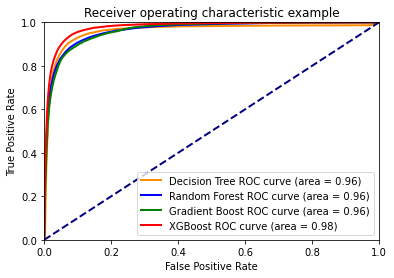

In [12]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
decpred = newclf.predict_proba(std_Xtest)[:,1]
rforpred= forbag.predict_proba(std_Xtest)[:,1]
gradboopred= gradientboost.predict_proba(std_Xtest)[:,1]
XGboopred= model.predict_proba(std_Xtest)[:,1]
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, decpred)
rfpr, rtpr, _ = metrics.roc_curve(y_test, rforpred)
gfpr, gtpr, _ = metrics.roc_curve(y_test, gradboopred)
xfpr, xtpr, _ = metrics.roc_curve(y_test, XGboopred)
# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)
forroc_auc = metrics.auc(rfpr, rtpr)
gradroc_auc = metrics.auc(gfpr, gtpr)
xgroc_auc = metrics.auc(xfpr, xtpr)
# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'Decision Tree ROC curve (area = %0.2f)' % roc_auc)
plt.plot(rfpr, rtpr, color='blue', lw = lw, label = 'Random Forest ROC curve (area = %0.2f)' % forroc_auc)
plt.plot(gfpr, gtpr, color='green', lw = lw, label = 'Gradient Boost ROC curve (area = %0.2f)' % gradroc_auc)
plt.plot(xfpr, xtpr, color='red', lw = lw, label = 'XGBoost ROC curve (area = %0.2f)' % xgroc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()


Using the ROC curves we can see that many of the models perform very well. However the best performing model goes to the XGBoost model which we will now use to answer our follow up question of what are the important features

In [7]:
#Get feature importances
importances=model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

In [12]:
plt.title('Feature Importance')
plt.rcParams["figure.figsize"] = (160,90)
plt.rcParams.update({'font.size':80})
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.show()